In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv'
df = pd.read_csv(file_path, sep=',', engine='python', on_bad_lines='skip')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
object_columns = df.select_dtypes(include='object').columns.tolist()

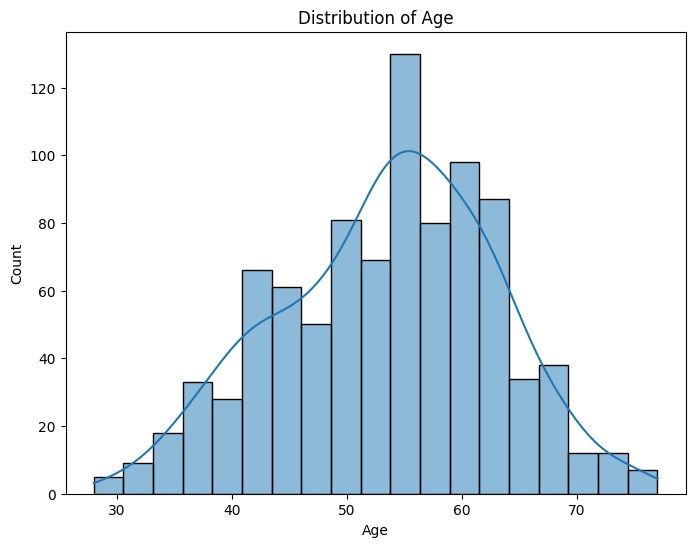

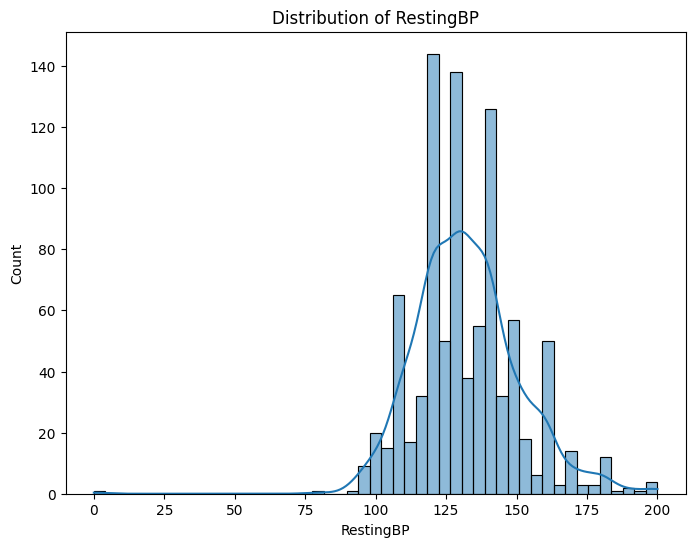

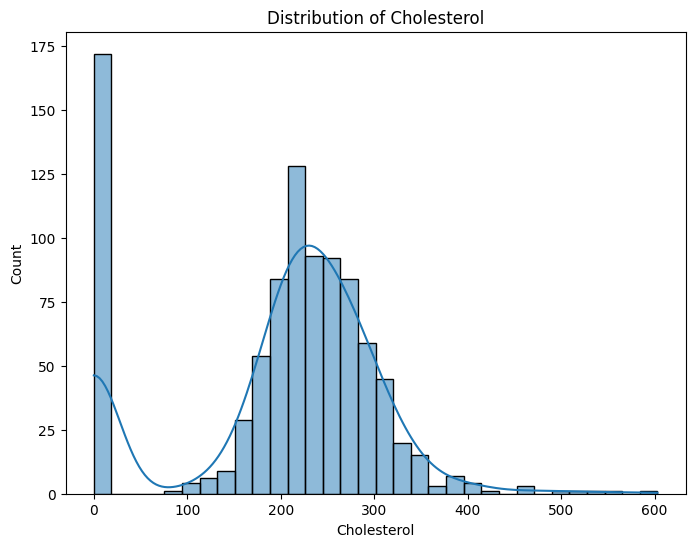

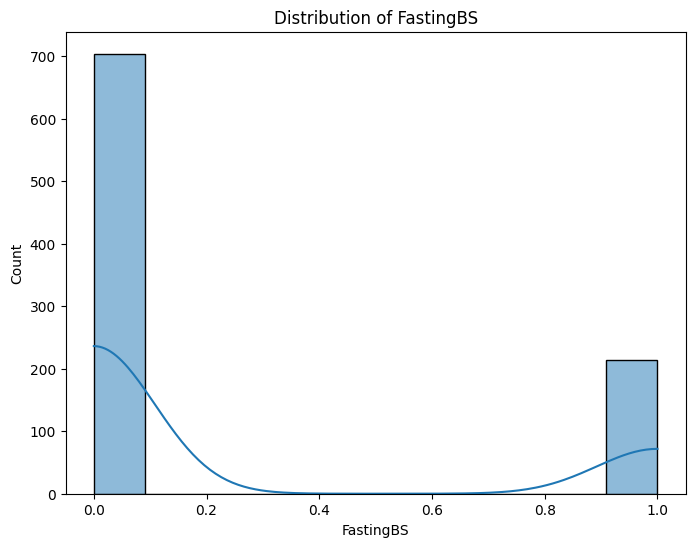

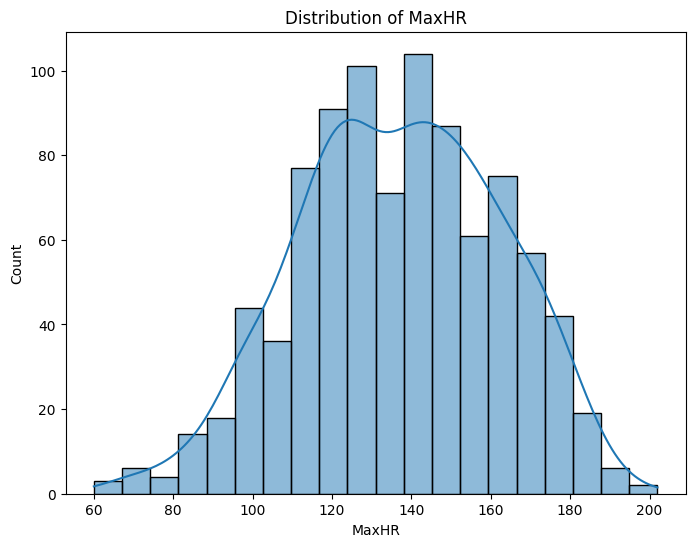

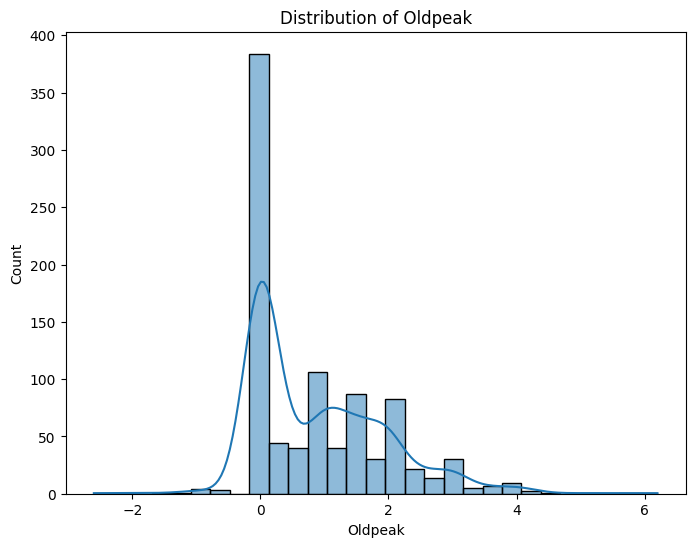

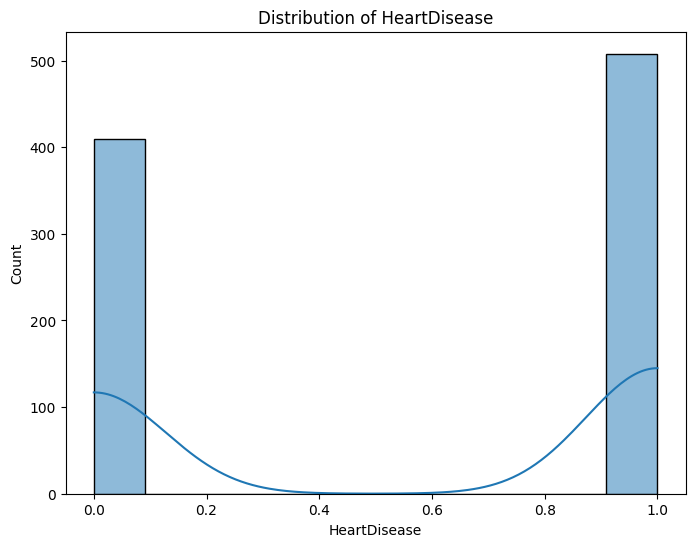

In [6]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

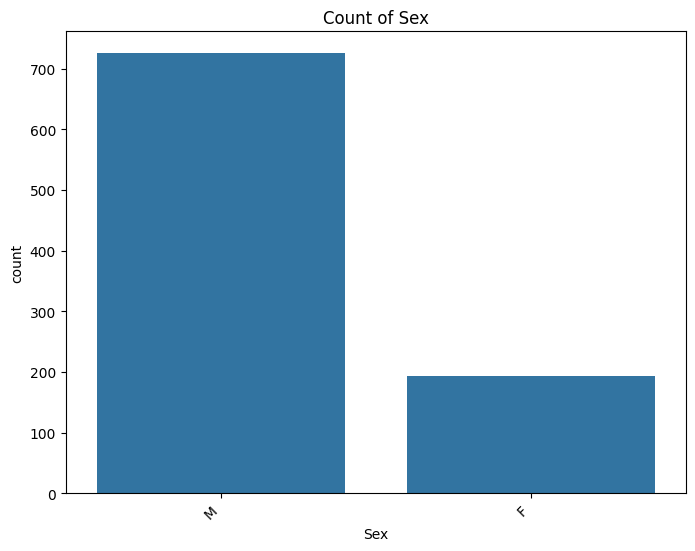

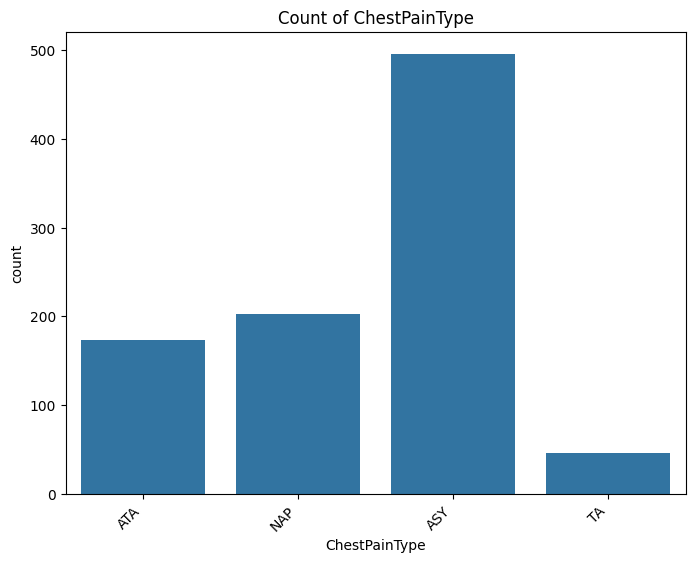

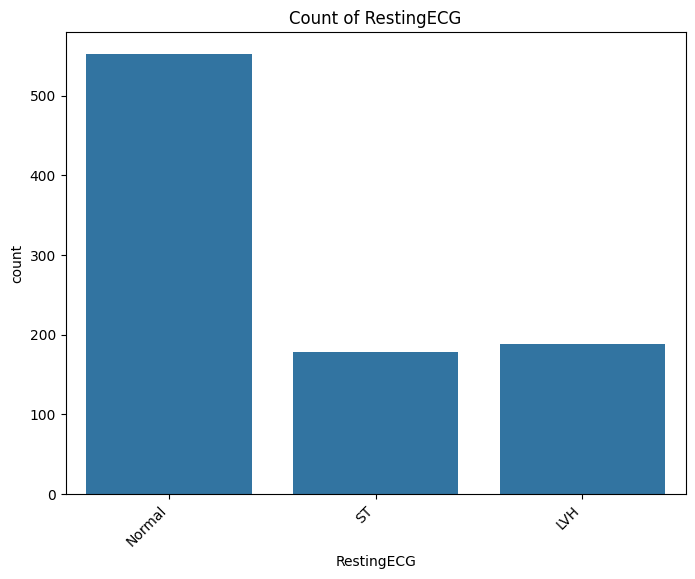

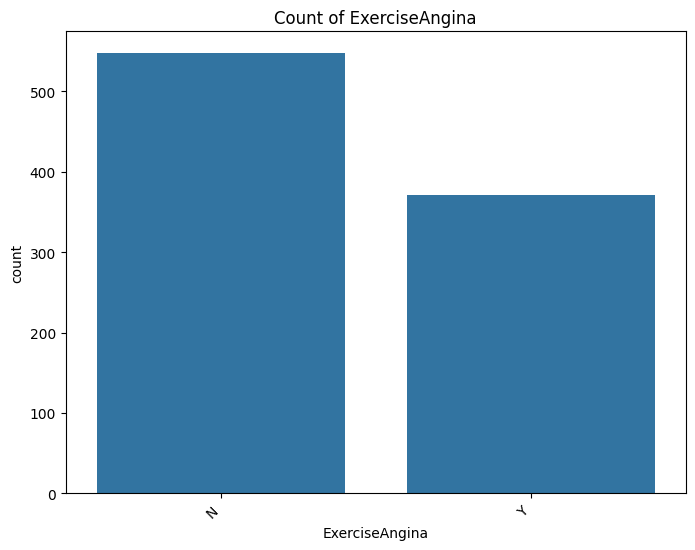

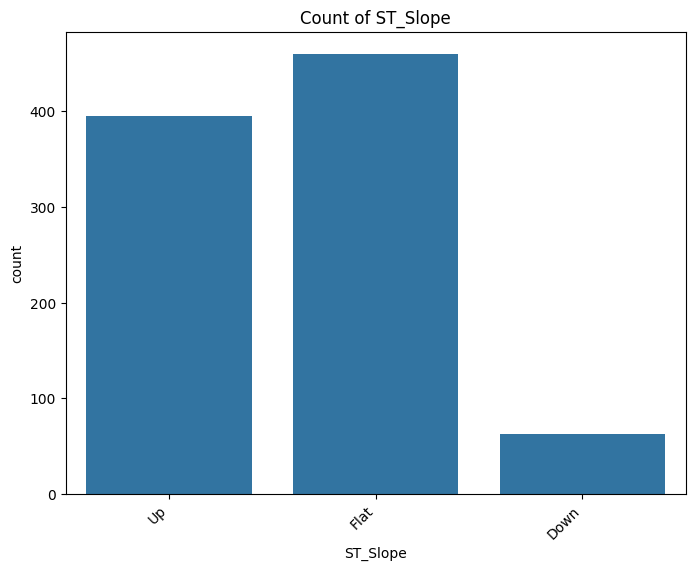

In [7]:
for col in object_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

We need to transform RestingBS and Heart Disease to categorical first

In [8]:
df['FastingBS'] = df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')

df[['FastingBS', 'HeartDisease']]

,FastingBS,HeartDisease
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
913,0,1
914,1,1
915,0,1
916,0,1


## Seeing Correlations with the Target (Heart Disease)

For the next three cell, if you want to run them without error, run the notebook from the start. This is because `.remove()` and `.append()` functions does not return and manipulate the list directly.

In [9]:
numeric_columns.remove('FastingBS')
numeric_columns.remove('HeartDisease')

In [10]:
numeric_columns

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [11]:
object_columns.append('FastingBS')

In [12]:
object_columns

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS']

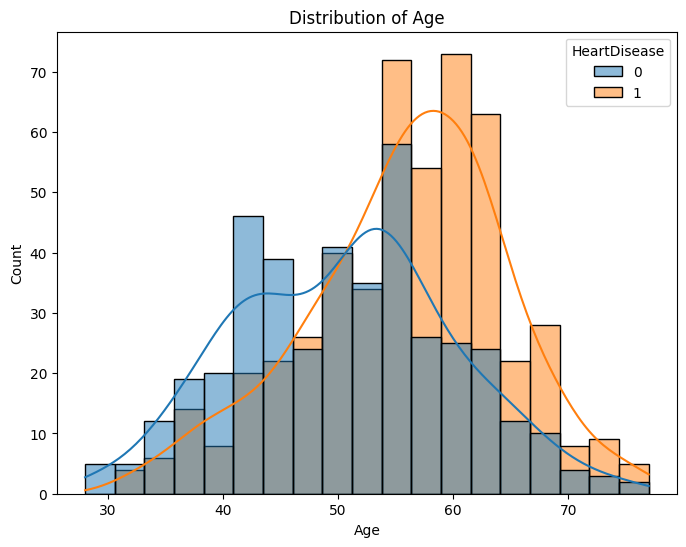

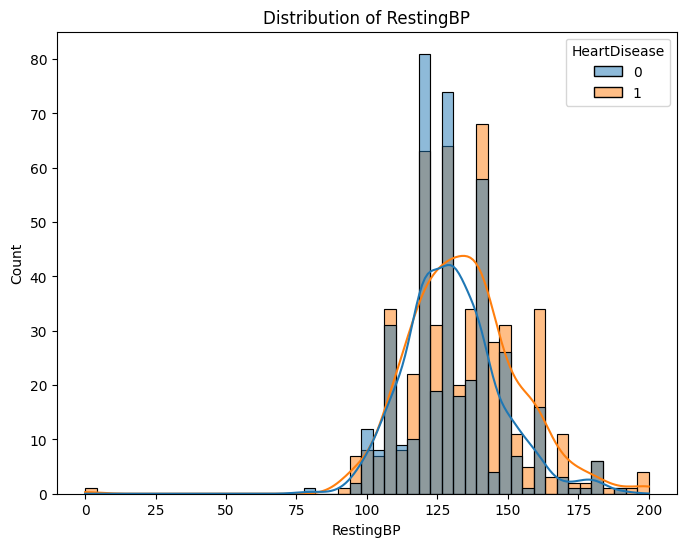

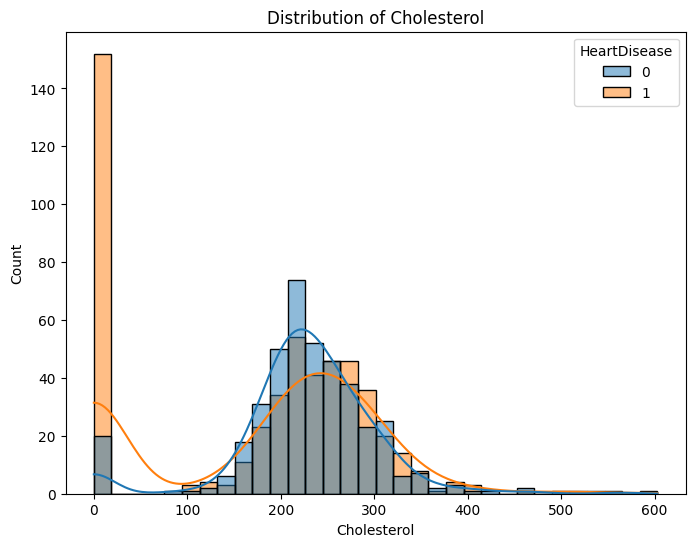

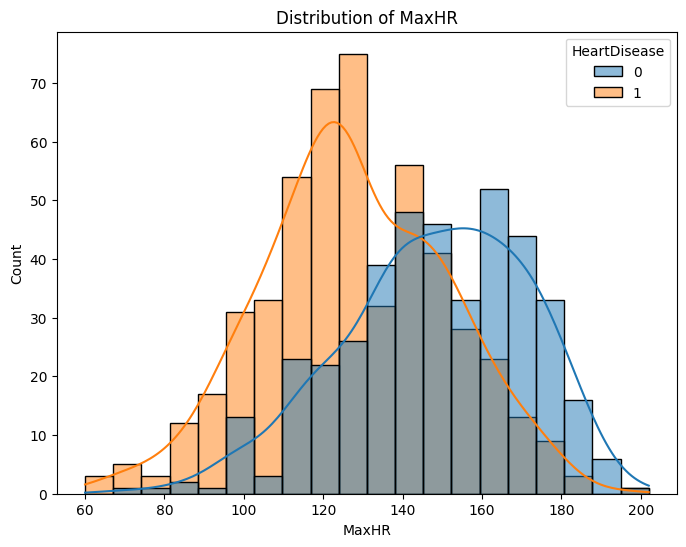

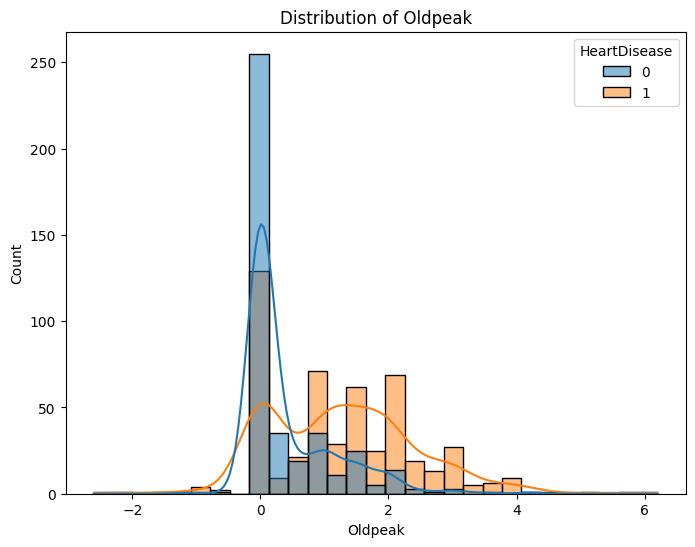

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, hue = 'HeartDisease')
    plt.title(f'Distribution of {col}')
    plt.show()

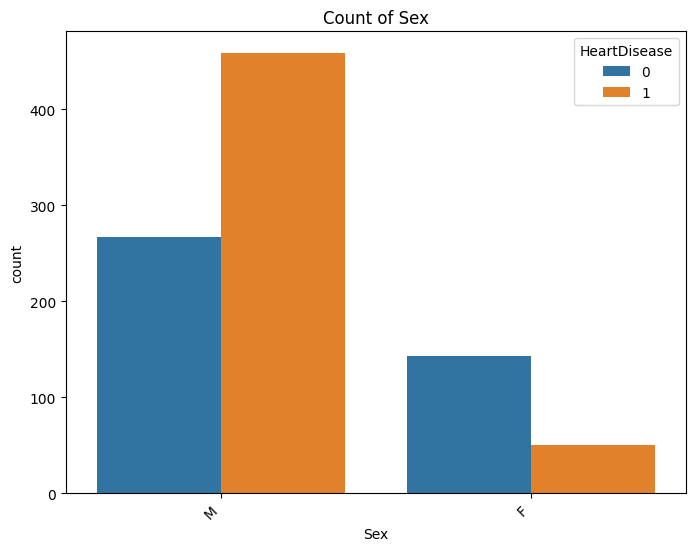

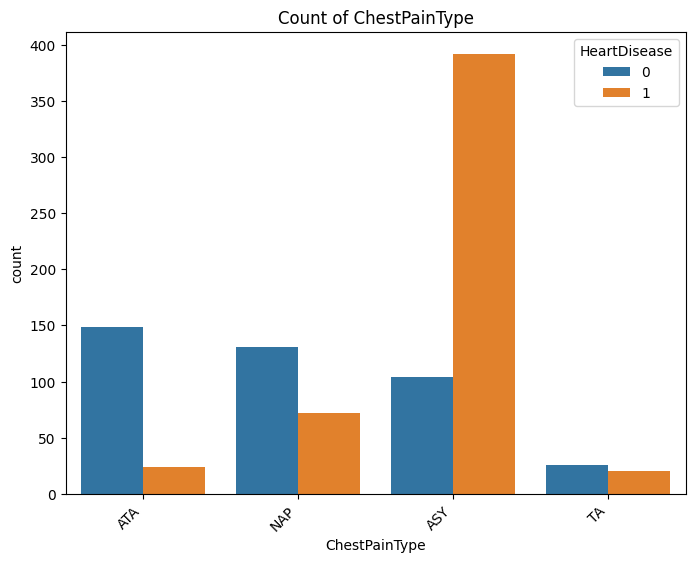

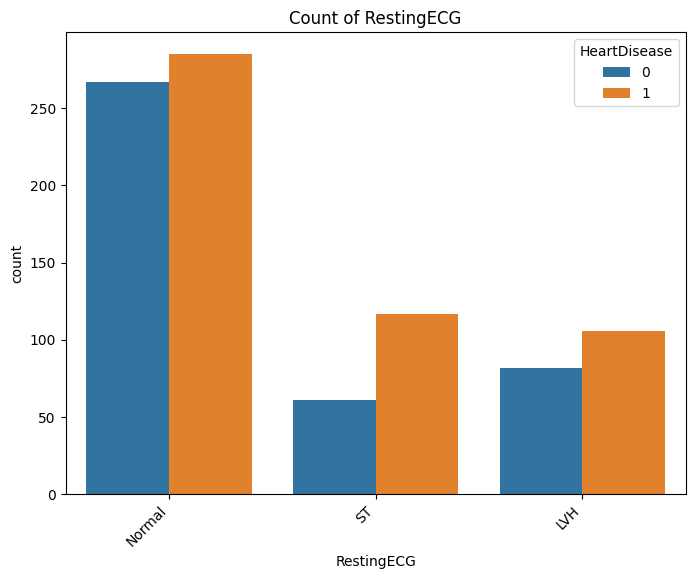

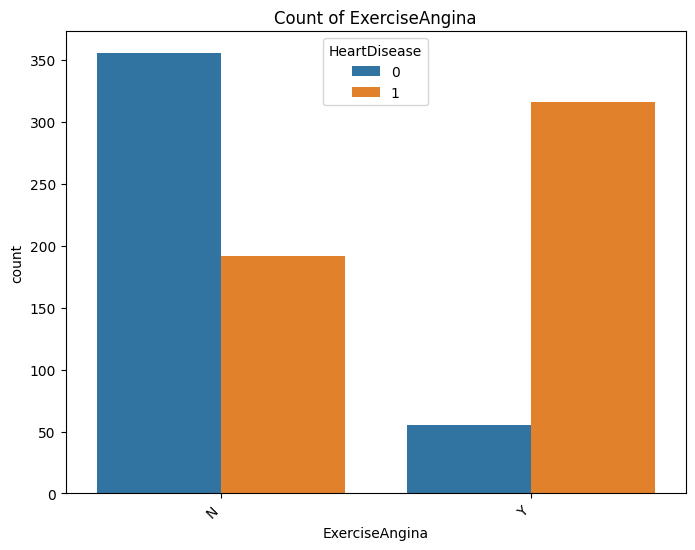

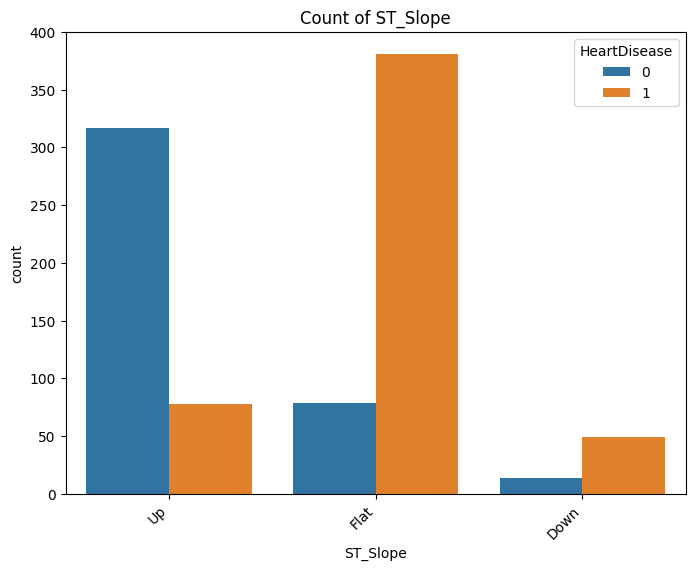

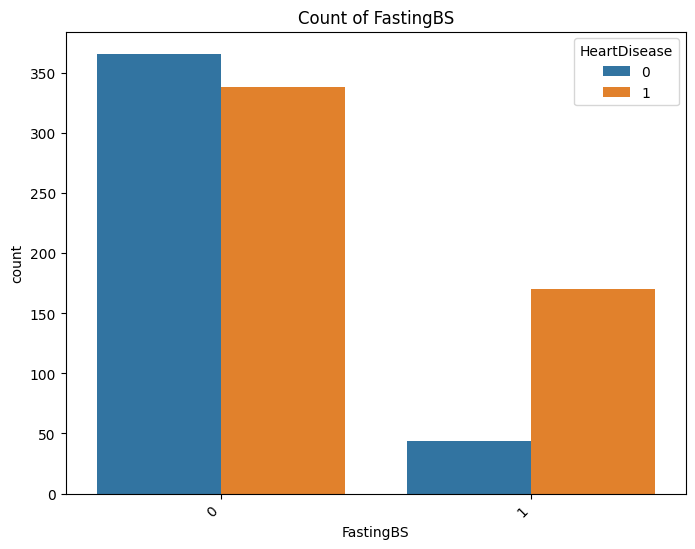

In [14]:
for col in object_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue = 'HeartDisease')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Visual Correlation among each variables

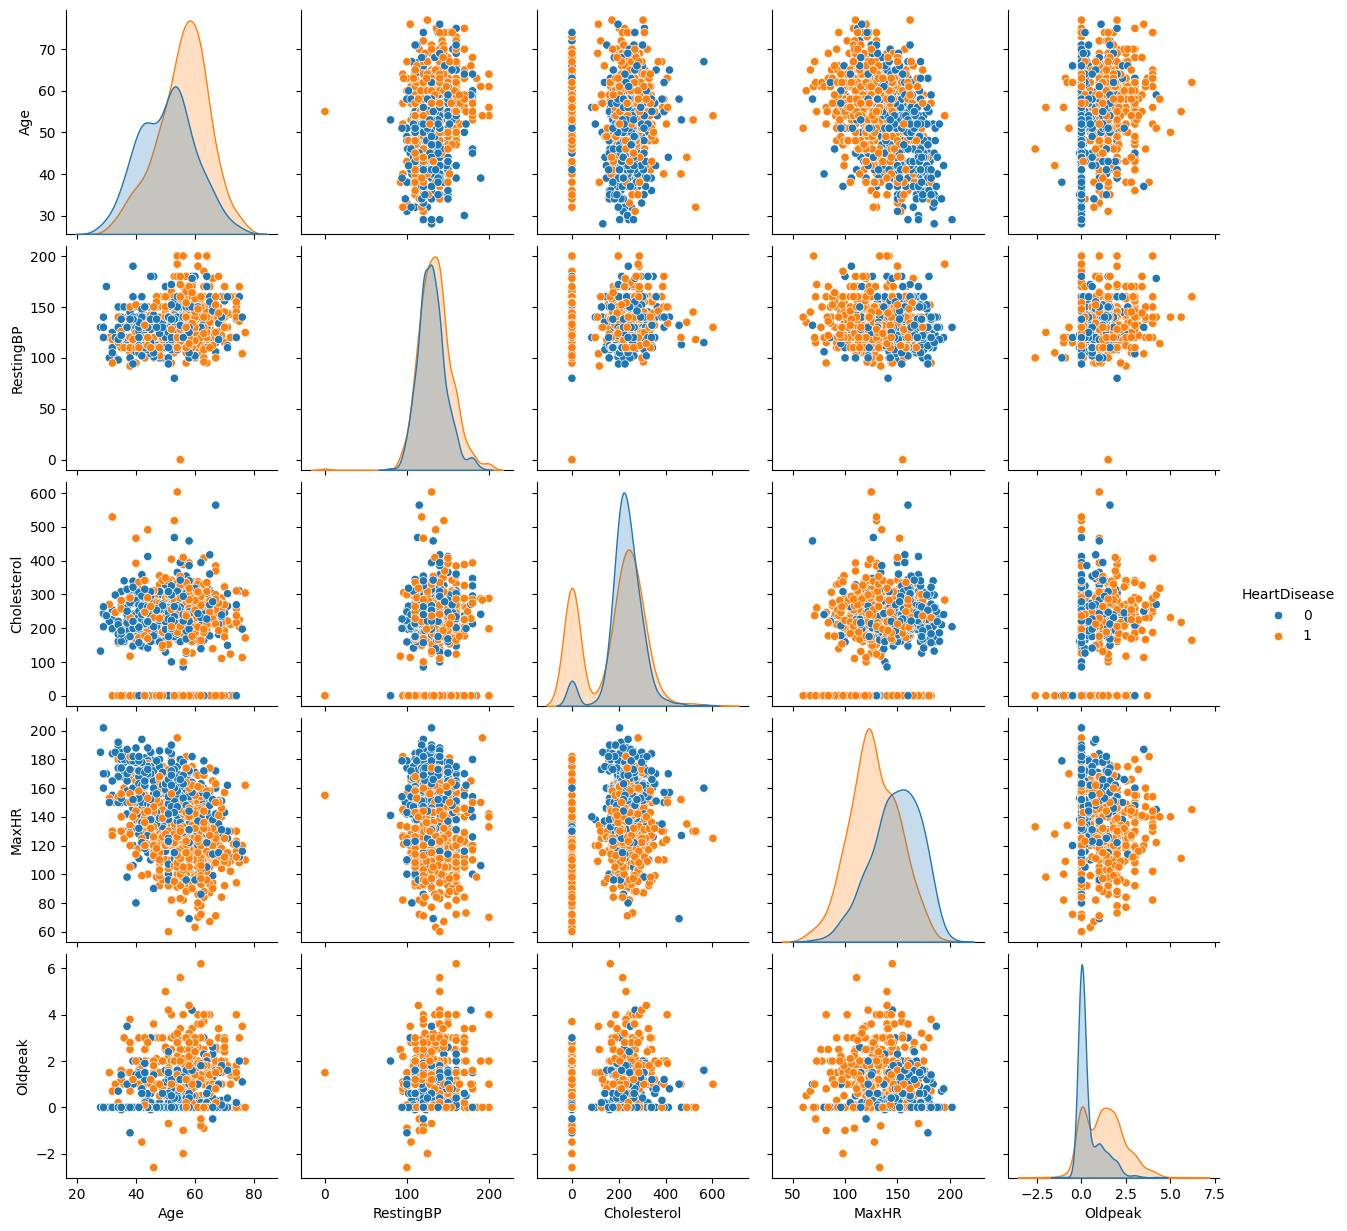

In [15]:
sns.pairplot(df, hue = 'HeartDisease')
plt.show()

The categorical columns seems to not be included there.

We can perform 'one-hot encoding' for the categorical columns

<img src = 'https://miro.medium.com/1*ggtP4a5YaRx6l09KQaYOnw.png'>

In [16]:
# Select object columns excluding 'HeartDisease'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'HeartDisease' in categorical_cols:
    categorical_cols.remove('HeartDisease')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


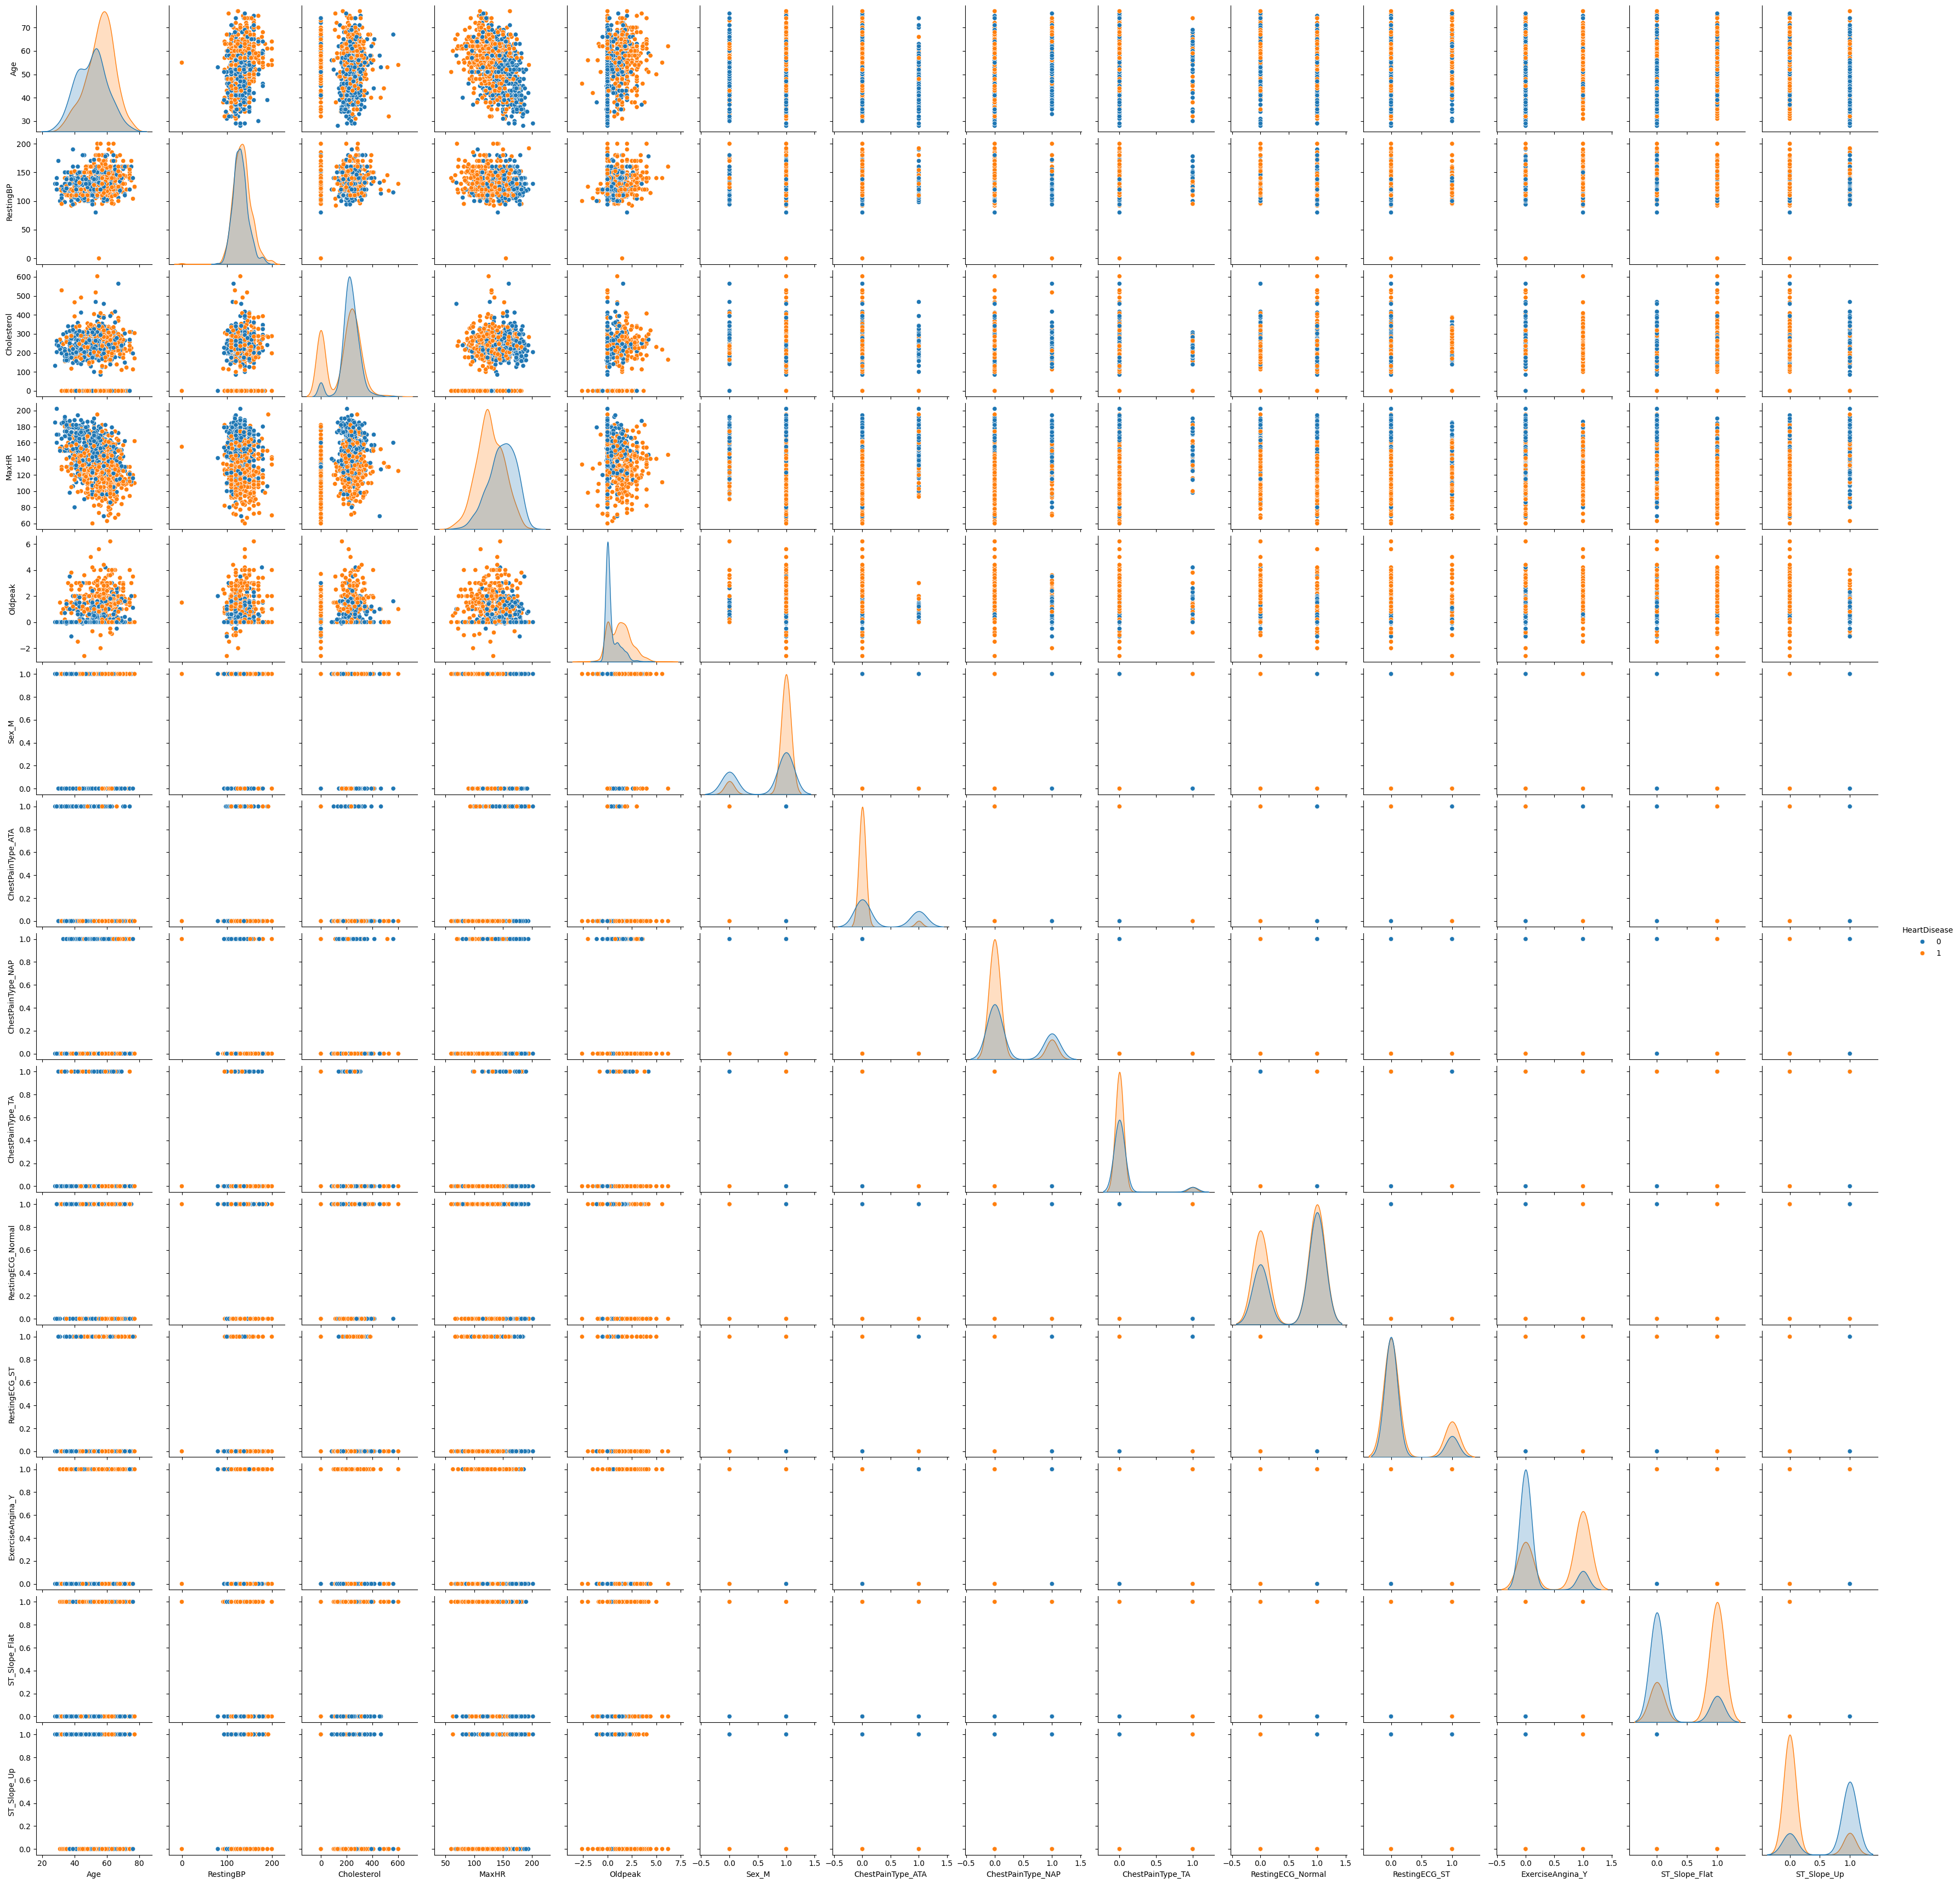

In [17]:
sns.pairplot(df_encoded, hue = 'HeartDisease')
plt.show()

Seems a bit cluttered, let's use another visualisation (heatmap correlation)

The correlation calculation:
<img src = 'https://data36.com/wp-content/uploads/2022/09/correlation-calculation-formula-1.png'>

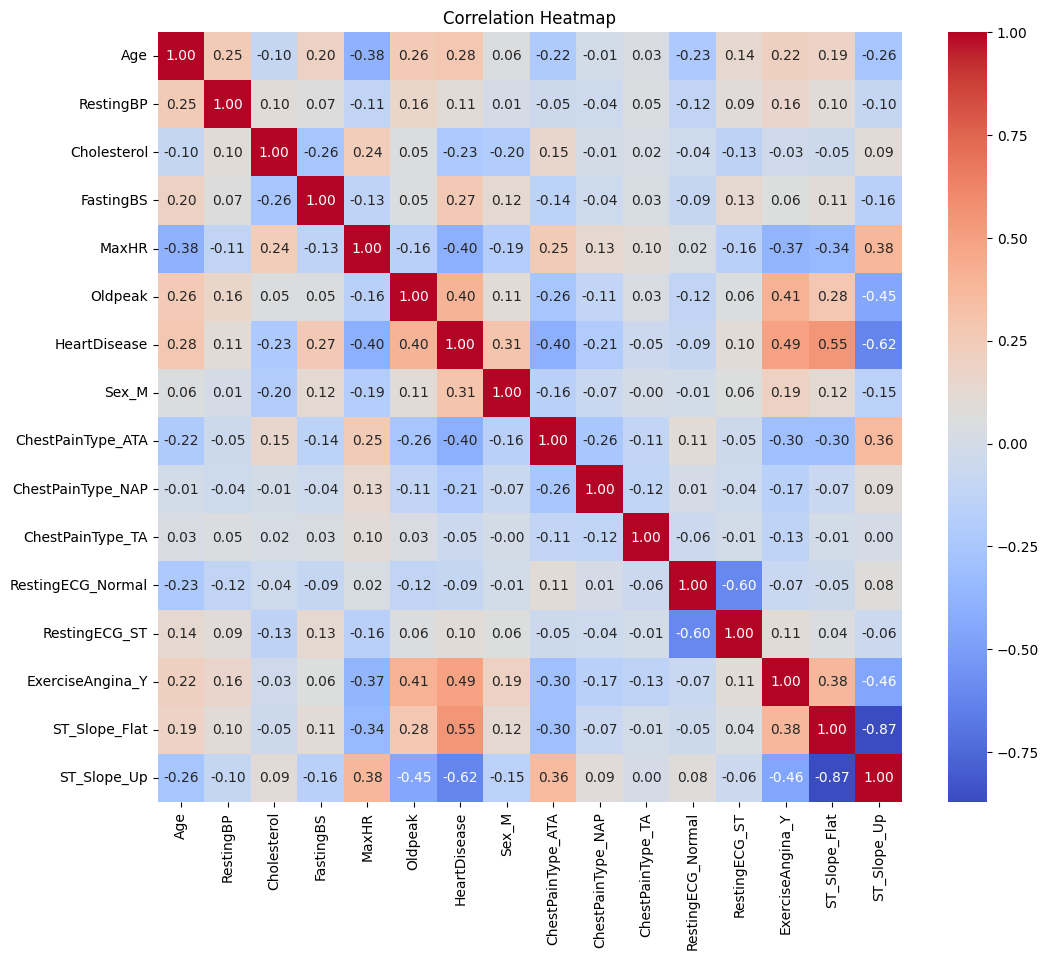

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()